ML Project by:
Abir Krishna Banerjee (AP23110010414)
Nikhil Kumar (AP23110010119)

VIDEO GAME TOXIC CHAT PREDICTION USING LOGISTIC REGRESSION

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)
import re
import warnings
warnings.filterwarnings('ignore')

Step 1: Load and Explore Data

In [72]:
df = pd.read_csv('train.csv', engine='python', on_bad_lines='skip')

In [73]:
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nColumn names:")
print(df.columns.tolist())

print(f"\nData info:")
print(df.info())

print(f"\nMissing values:")
print(df.isnull().sum())



Dataset shape: (159571, 8)

First few rows:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  

Column names:
['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

Data inf

In [74]:
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

print(f"\nClass distribution:")
for col in toxicity_columns:
    print(f"{col}: {df[col].sum()} ({df[col].mean()*100:.2f}%)")


Class distribution:
toxic: 15294 (9.58%)
severe_toxic: 1595 (1.00%)
obscene: 8449 (5.29%)
threat: 478 (0.30%)
insult: 7877 (4.94%)
identity_hate: 1405 (0.88%)


In [75]:
import pandas as pd

# Load and inspect
df = pd.read_csv('train.csv', on_bad_lines='skip', encoding='utf-8', engine='python')

print("Column names:")
print(df.columns.tolist())

print("\nFirst 3 rows:")
print(df.head(3))

print(f"\nShape: {df.shape}")

Column names:
['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

First 3 rows:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  

Shape: (159571, 8)



✓ Class distribution plot saved as 'class_distribution.png'


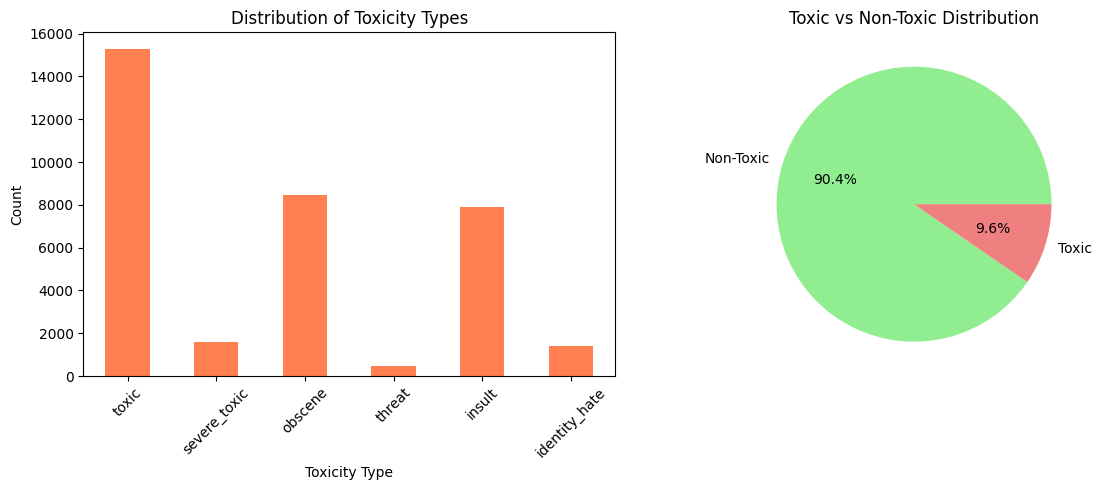

In [76]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df[toxicity_columns].sum().plot(kind='bar', color='coral')
plt.title('Distribution of Toxicity Types')
plt.xlabel('Toxicity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
toxic_counts = df['toxic'].value_counts()
plt.pie(toxic_counts, labels=['Non-Toxic', 'Toxic'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Toxic vs Non-Toxic Distribution')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
print("\n✓ Class distribution plot saved as 'class_distribution.png'")

Step 2: Text Preprocessing

In [77]:
def clean_text(text):
    """
    Clean and preprocess text data
    """
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [78]:
print("\nCleaning text data...")
df['clean_comment'] = df['comment_text'].apply(clean_text)

print("\nExample of cleaned text:")
print(f"Original: {df['comment_text'].iloc[0][:100]}...")
print(f"Cleaned: {df['clean_comment'].iloc[0][:100]}...")



Cleaning text data...

Example of cleaned text:
Original: Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't ...
Cleaned: explanation why the edits made under my username hardcore metallica fan were reverted they weren t v...


Step 3: Feature Extraction

In [79]:
# Prepare features (X) and target (y)
X = df['clean_comment']
y = df['toxic']  # Binary classification: toxic or not

In [80]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Toxic comments in training: {y_train.sum()} ({y_train.mean()*100:.2f}%)")
print(f"Toxic comments in testing: {y_test.sum()} ({y_test.mean()*100:.2f}%)")


Training set size: 127656
Testing set size: 31915
Toxic comments in training: 12235 (9.58%)
Toxic comments in testing: 3059 (9.58%)


In [81]:
# Create TF-IDF vectorizer
print("\nCreating TF-IDF features...")
vectorizer = TfidfVectorizer(
    max_features=10000,      # Top 10000 most important words
    min_df=5,               # Ignore terms that appear in less than 5 documents
    max_df=0.8,             # Ignore terms that appear in more than 80% of documents
    ngram_range=(1, 2),     # Consider unigrams and bigrams
    stop_words='english'    # Remove common English stop words
)


Creating TF-IDF features...


In [82]:
# Transform text to TF-IDF features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF feature matrix shape: {X_train_tfidf.shape}")
print(f"Number of features: {len(vectorizer.get_feature_names_out())}")

TF-IDF feature matrix shape: (127656, 10000)
Number of features: 10000


Step 4: Train Logistic Regression Model

In [83]:
# Train Logistic Regression with class weights to handle imbalanced data
print("\nTraining Logistic Regression model...")
model = LogisticRegression(
    C=10.0,                      # Regularization strength
    max_iter=1000,              # Maximum iterations
    class_weight='balanced',    # Handle class imbalance
    random_state=42,
    solver='liblinear'          # Good for binary classification
)

model.fit(X_train_tfidf, y_train)
print("✓ Model training completed!")


Training Logistic Regression model...
✓ Model training completed!


Step 5: Evaluate Model Performance

In [84]:
# Make predictions
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]

# 2. Set a higher threshold (Stricter rules = Higher Precision)
# Try 0.80. If you need even more precision, try 0.90.
threshold = 0.95

# 3. Convert probabilities to 0 or 1 based on your new threshold
y_pred = (y_pred_proba > threshold).astype(int)

In [85]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n{'='*50}")
print(f"MODEL PERFORMANCE METRICS")
print(f"{'='*50}")
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")
print(f"{'='*50}")


MODEL PERFORMANCE METRICS
Accuracy:  0.9572 (95.72%)
Precision: 0.8842
Recall:    0.6365
F1-Score:  0.7402
ROC-AUC:   0.9620


✓ Confusion matrix saved as 'confusion_matrix.png'


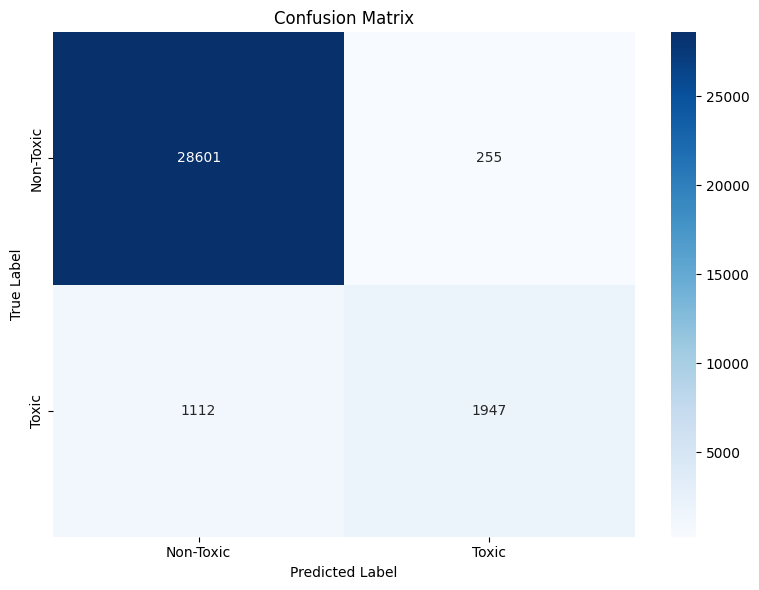

In [86]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Toxic', 'Toxic'],
            yticklabels=['Non-Toxic', 'Toxic'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Confusion matrix saved as 'confusion_matrix.png'")

✓ ROC curve saved as 'roc_curve.png'


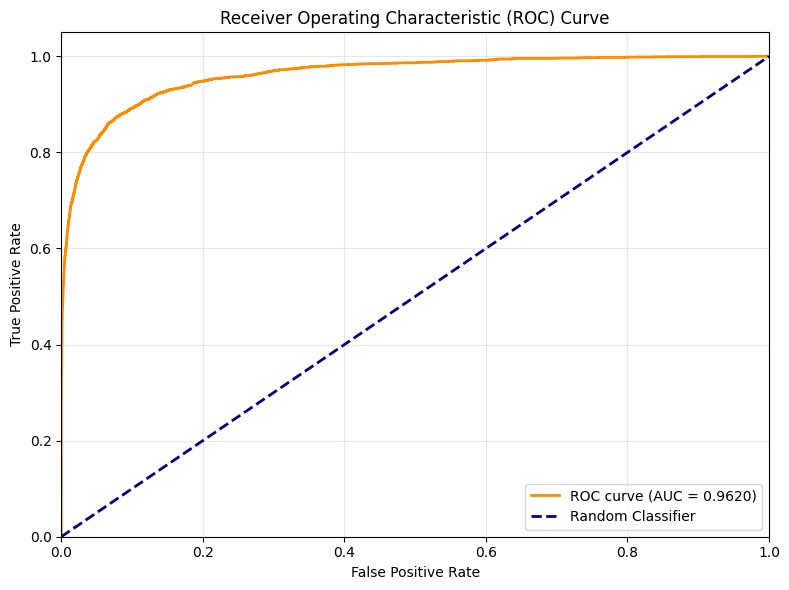

In [87]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
print("✓ ROC curve saved as 'roc_curve.png'")

In [88]:
# Feature importance (top toxic words)
print("\nTop 20 Most Toxic Words (based on model coefficients):")
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
toxic_words = pd.DataFrame({
    'word': feature_names,
    'coefficient': coefficients
}).sort_values('coefficient', ascending=False).head(20)
print(toxic_words.to_string(index=False))


Top 20 Most Toxic Words (based on model coefficients):
    word  coefficient
    fuck    32.675316
 fucking    27.944625
    shit    21.528246
   idiot    20.459153
  stupid    18.552258
bullshit    18.443021
     ass    16.319650
 asshole    15.109262
   sucks    14.629577
    suck    14.538727
   bitch    14.324268
  fucked    14.217658
    crap    13.934891
 bastard    13.690445
   moron    13.656140
  idiots    12.657222
    jerk    12.381207
  faggot    12.209572
pathetic    12.075509
  fucker    12.006337


Step 6: Test with Custom Examples

In [89]:
def predict_toxicity(text, threshold=0.5):
    """
    Predict if a comment is toxic
    """
    # Clean the text
    cleaned = clean_text(text)

    # Transform to TF-IDF
    text_tfidf = vectorizer.transform([cleaned])

    # Predict
    prediction = model.predict(text_tfidf)[0]
    probability = model.predict_proba(text_tfidf)[0][1]

    return {
        'text': text,
        'toxic': bool(prediction),
        'probability': probability,
        'confidence': 'High' if abs(probability - 0.5) > 0.3 else 'Medium' if abs(probability - 0.5) > 0.15 else 'Low'
    }

In [90]:
# Test examples
test_examples = [
    "You are an amazing player! Great game!",
    "I hate you, you stupid noob!",
    "GG well played everyone",
    "You suck at this game, uninstall!",
    "Thanks for the help, really appreciate it",
    "This team is trash, everyone is terrible"
]

print("\nTesting custom examples:\n")
for example in test_examples:
    result = predict_toxicity(example)
    status = "🔴 TOXIC" if result['toxic'] else "🟢 NON-TOXIC"
    print(f"{status} ({result['confidence']} confidence: {result['probability']:.3f})")
    print(f"   Text: \"{result['text']}\"")
    print()


Testing custom examples:

🟢 NON-TOXIC (High confidence: 0.075)
   Text: "You are an amazing player! Great game!"

🔴 TOXIC (High confidence: 1.000)
   Text: "I hate you, you stupid noob!"

🟢 NON-TOXIC (Medium confidence: 0.310)
   Text: "GG well played everyone"

🔴 TOXIC (High confidence: 1.000)
   Text: "You suck at this game, uninstall!"

🟢 NON-TOXIC (High confidence: 0.005)
   Text: "Thanks for the help, really appreciate it"

🔴 TOXIC (High confidence: 0.989)
   Text: "This team is trash, everyone is terrible"

